# data exploration of tags in posts set


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 



In [2]:
# df = pd.read_csv('data/gaming/csv/posts.csv')
df = pd.read_csv('data/gaming/tsv/Posts_text.tsv', sep='\t') 


In [3]:
df.describe()

,Id,PostTypeId,ParentId,AcceptedAnswerId,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount
count,246183.000000,246183.000000,148943.000000,55630.000000,246183.000000,8.994300e+04,241058.000000,105723.000000,89943.000000,246183.000000,19040.000000
mean,177099.095193,1.709180,159308.197143,163494.186087,3.961167,9.258596e+03,67994.166367,55083.386179,1.655971,1.261740,1.505935
std,107687.623997,0.690302,106671.543024,107819.393989,7.376173,3.602772e+04,66807.357044,63397.334120,1.346068,2.064678,2.560916
min,1.000000,1.000000,1.000000,14.000000,-65.000000,4.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,78225.500000,1.000000,60804.000000,65975.500000,1.000000,4.350000e+02,11502.000000,4163.000000,1.000000,0.000000,1.000000
50%,173652.000000,2.000000,148883.000000,151511.500000,2.000000,1.457000e+03,46563.000000,27328.000000,1.000000,0.000000,1.000000
75%,271805.500000,2.000000,252090.500000,258603.500000,5.000000,5.410000e+03,115002.500000,88253.000000,2.000000,2.000000,2.000000
max,364626.000000,7.000000,364621.000000,364610.000000,469.000000,2.445214e+06,244787.000000,244757.000000,29.000000,44.000000,97.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246183 entries, 0 to 246182
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     246183 non-null  int64  
 1   PostTypeId             246183 non-null  int64  
 2   ParentId               148943 non-null  float64
 3   AcceptedAnswerId       55630 non-null   float64
 4   CreationDate           246183 non-null  object 
 5   Score                  246183 non-null  int64  
 6   ViewCount              89943 non-null   float64
 7   Body                   244856 non-null  object 
 8   OwnerUserId            241058 non-null  float64
 9   OwnerDisplayName       6419 non-null    object 
 10  LastEditorUserId       105723 non-null  float64
 11  LastEditorDisplayName  6272 non-null    object 
 12  LastEditDate           110401 non-null  object 
 13  LastActivityDate       246183 non-null  object 
 14  Title                  89943 non-nul

In [5]:
df.Score.describe()

count    246183.000000
mean          3.961167
std           7.376173
min         -65.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         469.000000
Name: Score, dtype: float64

In [6]:
df.head().Tags

0                                    <team-fortress-2>
1                     <starcraft-2><starcraft-protoss>
2                               <steam><source-engine>
3                        <the-secret-of-monkey-island>
4    <backwards-compatibility><windows-xp><sam-and-...
Name: Tags, dtype: object

In [7]:
df.count()

Id                       246183
PostTypeId               246183
ParentId                 148943
AcceptedAnswerId          55630
CreationDate             246183
Score                    246183
ViewCount                 89943
Body                     244856
OwnerUserId              241058
OwnerDisplayName           6419
LastEditorUserId         105723
LastEditorDisplayName      6272
LastEditDate             110401
LastActivityDate         246183
Title                     89943
Tags                      89943
AnswerCount               89943
CommentCount             246183
FavoriteCount             19040
CommunityOwnedDate          608
ClosedDate                 6745
dtype: int64

In [8]:
df.isna().sum()/(len(df))*100

Id                        0.000000
PostTypeId                0.000000
ParentId                 39.499072
AcceptedAnswerId         77.402989
CreationDate              0.000000
Score                     0.000000
ViewCount                63.464983
Body                      0.539030
OwnerUserId               2.081785
OwnerDisplayName         97.392590
LastEditorUserId         57.055118
LastEditorDisplayName    97.452302
LastEditDate             55.154905
LastActivityDate          0.000000
Title                    63.464983
Tags                     63.464983
AnswerCount              63.464983
CommentCount              0.000000
FavoriteCount            92.265916
CommunityOwnedDate       99.753029
ClosedDate               97.260168
dtype: float64

In [9]:
df.Tags.str.lower().str.contains('minecraft').sum()

12458

In [10]:
tags_nan_filter = (df.Tags.isna() != True)

In [11]:
dftags = df[tags_nan_filter]

In [12]:
dftags.isna().sum()/(len(dftags))*100

Id                         0.000000
PostTypeId                 0.000000
ParentId                 100.000000
AcceptedAnswerId          38.149717
CreationDate               0.000000
Score                      0.000000
ViewCount                  0.000000
Body                       0.000000
OwnerUserId                1.792246
OwnerDisplayName          97.846414
LastEditorUserId          45.650023
LastEditorDisplayName     96.091969
LastEditDate              42.406858
LastActivityDate           0.000000
Title                      0.000000
Tags                       0.000000
AnswerCount                0.000000
CommentCount               0.000000
FavoriteCount             78.831037
CommunityOwnedDate        99.973316
ClosedDate                92.500806
dtype: float64

In [13]:
dftags1 = dftags[:1000]

In [14]:
dftags1.Tags

0                                       <team-fortress-2>
1                        <starcraft-2><starcraft-protoss>
2                                  <steam><source-engine>
3                           <the-secret-of-monkey-island>
4       <backwards-compatibility><windows-xp><sam-and-...
                              ...                        
2825    <minecraft-java-edition><minecraft-java-editio...
2826                                  <little-big-planet>
2830                                                <ps3>
2832                                        <starcraft-2>
2833                                        <starcraft-2>
Name: Tags, Length: 1000, dtype: object

In [15]:
import re

str1 = '<distributions><normality-assumption>'
pattern = '\<([^\>]*)\>'
tags1  = re.findall(pattern=pattern, string=str1)


In [16]:
dftags1 = dftags1[['Id','Tags']]

In [17]:
dftags1['tagslist']=dftags1.Tags.str.findall(pattern)

In [18]:
dftags1

,Id,Tags,tagslist
0,1,<team-fortress-2>,[team-fortress-2]
1,2,<starcraft-2><starcraft-protoss>,"[starcraft-2, starcraft-protoss]"
2,3,<steam><source-engine>,"[steam, source-engine]"
3,4,<the-secret-of-monkey-island>,[the-secret-of-monkey-island]
4,6,<backwards-compatibility><windows-xp><sam-and-...,"[backwards-compatibility, windows-xp, sam-and-..."
...,...,...,...
2825,4672,<minecraft-java-edition><minecraft-java-editio...,"[minecraft-java-edition, minecraft-java-editio..."
2826,4675,<little-big-planet>,[little-big-planet]
2830,4681,<ps3>,[ps3]
2832,4684,<starcraft-2>,[starcraft-2]


In [19]:
dftags2 = dftags1[['Id','tagslist']].explode('tagslist')

In [20]:
dftags2.tagslist.nunique() # number of unique tags

403

In [21]:
dftags2_counts = dftags2.tagslist.value_counts()  # calue counts for each tag 

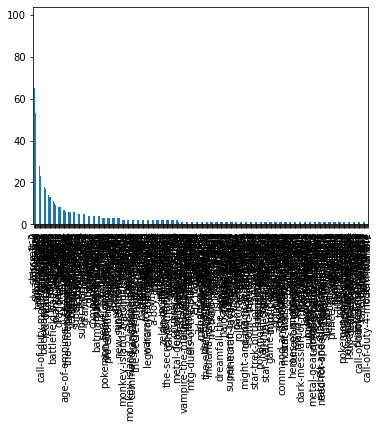

In [22]:
dftags2.tagslist.value_counts().plot.bar()

In [23]:
dftags2_counts.describe()

count    403.000000
mean       3.598015
std        8.338736
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       99.000000
Name: tagslist, dtype: float64

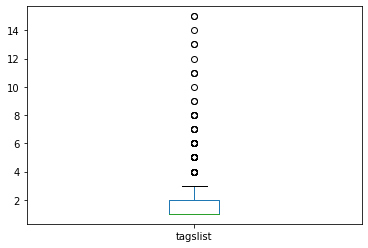

In [24]:
dftags2_counts[dftags2_counts <16].plot.box()

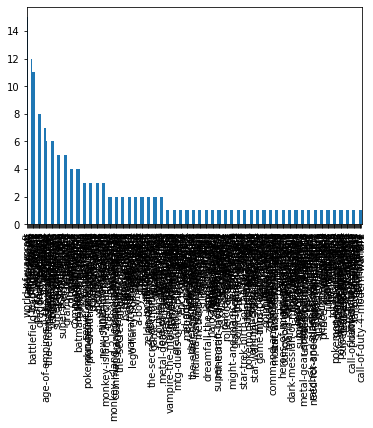

In [25]:
dftags2_counts[dftags2_counts <16].plot.bar()

In [26]:
dftags2.head()

,Id,tagslist
0,1,team-fortress-2
1,2,starcraft-2
1,2,starcraft-protoss
2,3,steam
2,3,source-engine


In [27]:
dftags2.reset_index(drop=True, inplace=True)

In [28]:
dftags2.head()

,Id,tagslist
0,1,team-fortress-2
1,2,starcraft-2
2,2,starcraft-protoss
3,3,steam
4,3,source-engine


In [29]:
dftags2.index

RangeIndex(start=0, stop=1450, step=1)

In [30]:
dftags2[dftags2.tagslist=='time-series']

,Id,tagslist


In [31]:
dftags2.rename(columns={'tagslist':'tag'},inplace=True)

In [32]:
dftags2.head()

,Id,tag
0,1,team-fortress-2
1,2,starcraft-2
2,2,starcraft-protoss
3,3,steam
4,3,source-engine


In [33]:
df.head()

,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,CommunityOwnedDate,ClosedDate
0,1,1,NaN,26.0,2010-07-07T19:06:25.043,44,5194.0,%3Cp%3ENow%20that%20the%20Engineer%20update%20...,11.0,NaN,...,NaN,2012-01-05T17:14:15.763,2015-01-11T03:37:51.813,What%20is%20a%20good%20strategy%20to%20deal%20...,<team-fortress-2>,7.0,4,2.0,NaN,NaN
1,2,1,NaN,184.0,2010-07-07T19:07:58.427,12,9989.0,%3Cp%3EI%20know%20I%20can%20create%20a%20Warp%...,10.0,NaN,...,NaN,2010-07-08T00:16:46.013,2017-12-09T23:39:22.607,What%20protoss%20unit%20can%20transport%20othe...,<starcraft-2><starcraft-protoss>,3.0,0,NaN,NaN,NaN
2,3,1,NaN,56.0,2010-07-07T19:09:46.317,16,3707.0,%3Cp%3ESteam%20won%27t%20let%20me%20have%20two...,14.0,NaN,...,user56,2013-10-23T11:12:37.397,2013-10-23T11:12:37.397,How%20can%20I%20run%20a%20dedicated%20server%2...,<steam><source-engine>,1.0,0,1.0,NaN,NaN
3,4,1,NaN,14.0,2010-07-07T19:11:05.640,30,3589.0,%3Cp%3EWhen%20I%20get%20to%20the%20insult%20sw...,17.0,NaN,...,NaN,2011-08-13T12:41:33.467,2015-09-15T19:52:02.517,Do%20I%20have%20to%20learn%20all%20of%20the%20...,<the-secret-of-monkey-island>,4.0,4,1.0,NaN,NaN
4,6,1,NaN,27.0,2010-07-07T19:13:20.177,13,5063.0,%3Cp%3EThe%20kids%20picked%20up%20a%20copy%20o...,13.0,NaN,...,NaN,2013-10-30T18:54:29.167,2014-05-07T15:42:02.310,How%20can%20I%20get%20Sam%20%26%20Max%20Hit%20...,<backwards-compatibility><windows-xp><sam-and-...,4.0,1,1.0,NaN,NaN


In [40]:
dfbody = df.head()[['Id','Body']]

In [41]:
dfbody

,Id,Body
0,1,%3Cp%3ENow%20that%20the%20Engineer%20update%20...
1,2,%3Cp%3EI%20know%20I%20can%20create%20a%20Warp%...
2,3,%3Cp%3ESteam%20won%27t%20let%20me%20have%20two...
3,4,%3Cp%3EWhen%20I%20get%20to%20the%20insult%20sw...
4,6,%3Cp%3EThe%20kids%20picked%20up%20a%20copy%20o...


In [37]:
import urllib


In [43]:
dfbody.Body = dfbody.Body.apply(urllib.parse.unquote)

In [44]:
dfbody

,Id,Body
0,1,"<p>Now that the Engineer update has come, ther..."
1,2,<p>I know I can create a Warp Gate and telepor...
2,3,<p>Steam won't let me have two instances runni...
3,4,<p>When I get to the insult sword-fighting sta...
4,6,<p>The kids picked up a copy of Sam &amp; Max ...
